# Trabajo práctico especial
A continuación se muestran los ejercicios del trabajo práctico especial

## Configuración inicial

Importamos las librerías y funciones necesarias.

In [23]:
from input.letters import letters
from scipy.io import wavfile as wav
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtp

Configuración de matplotlib para mostrar los gráficos inline.

In [3]:
%matplotlib inline

mtp.rcParams['figure.figsize'] = (10,4)
mtp.rcParams['figure.dpi'] = 300

## Ejercicio 1

Importamos el archivo de audio y lo graficamos, mostrando la posición de cada letra en la señal

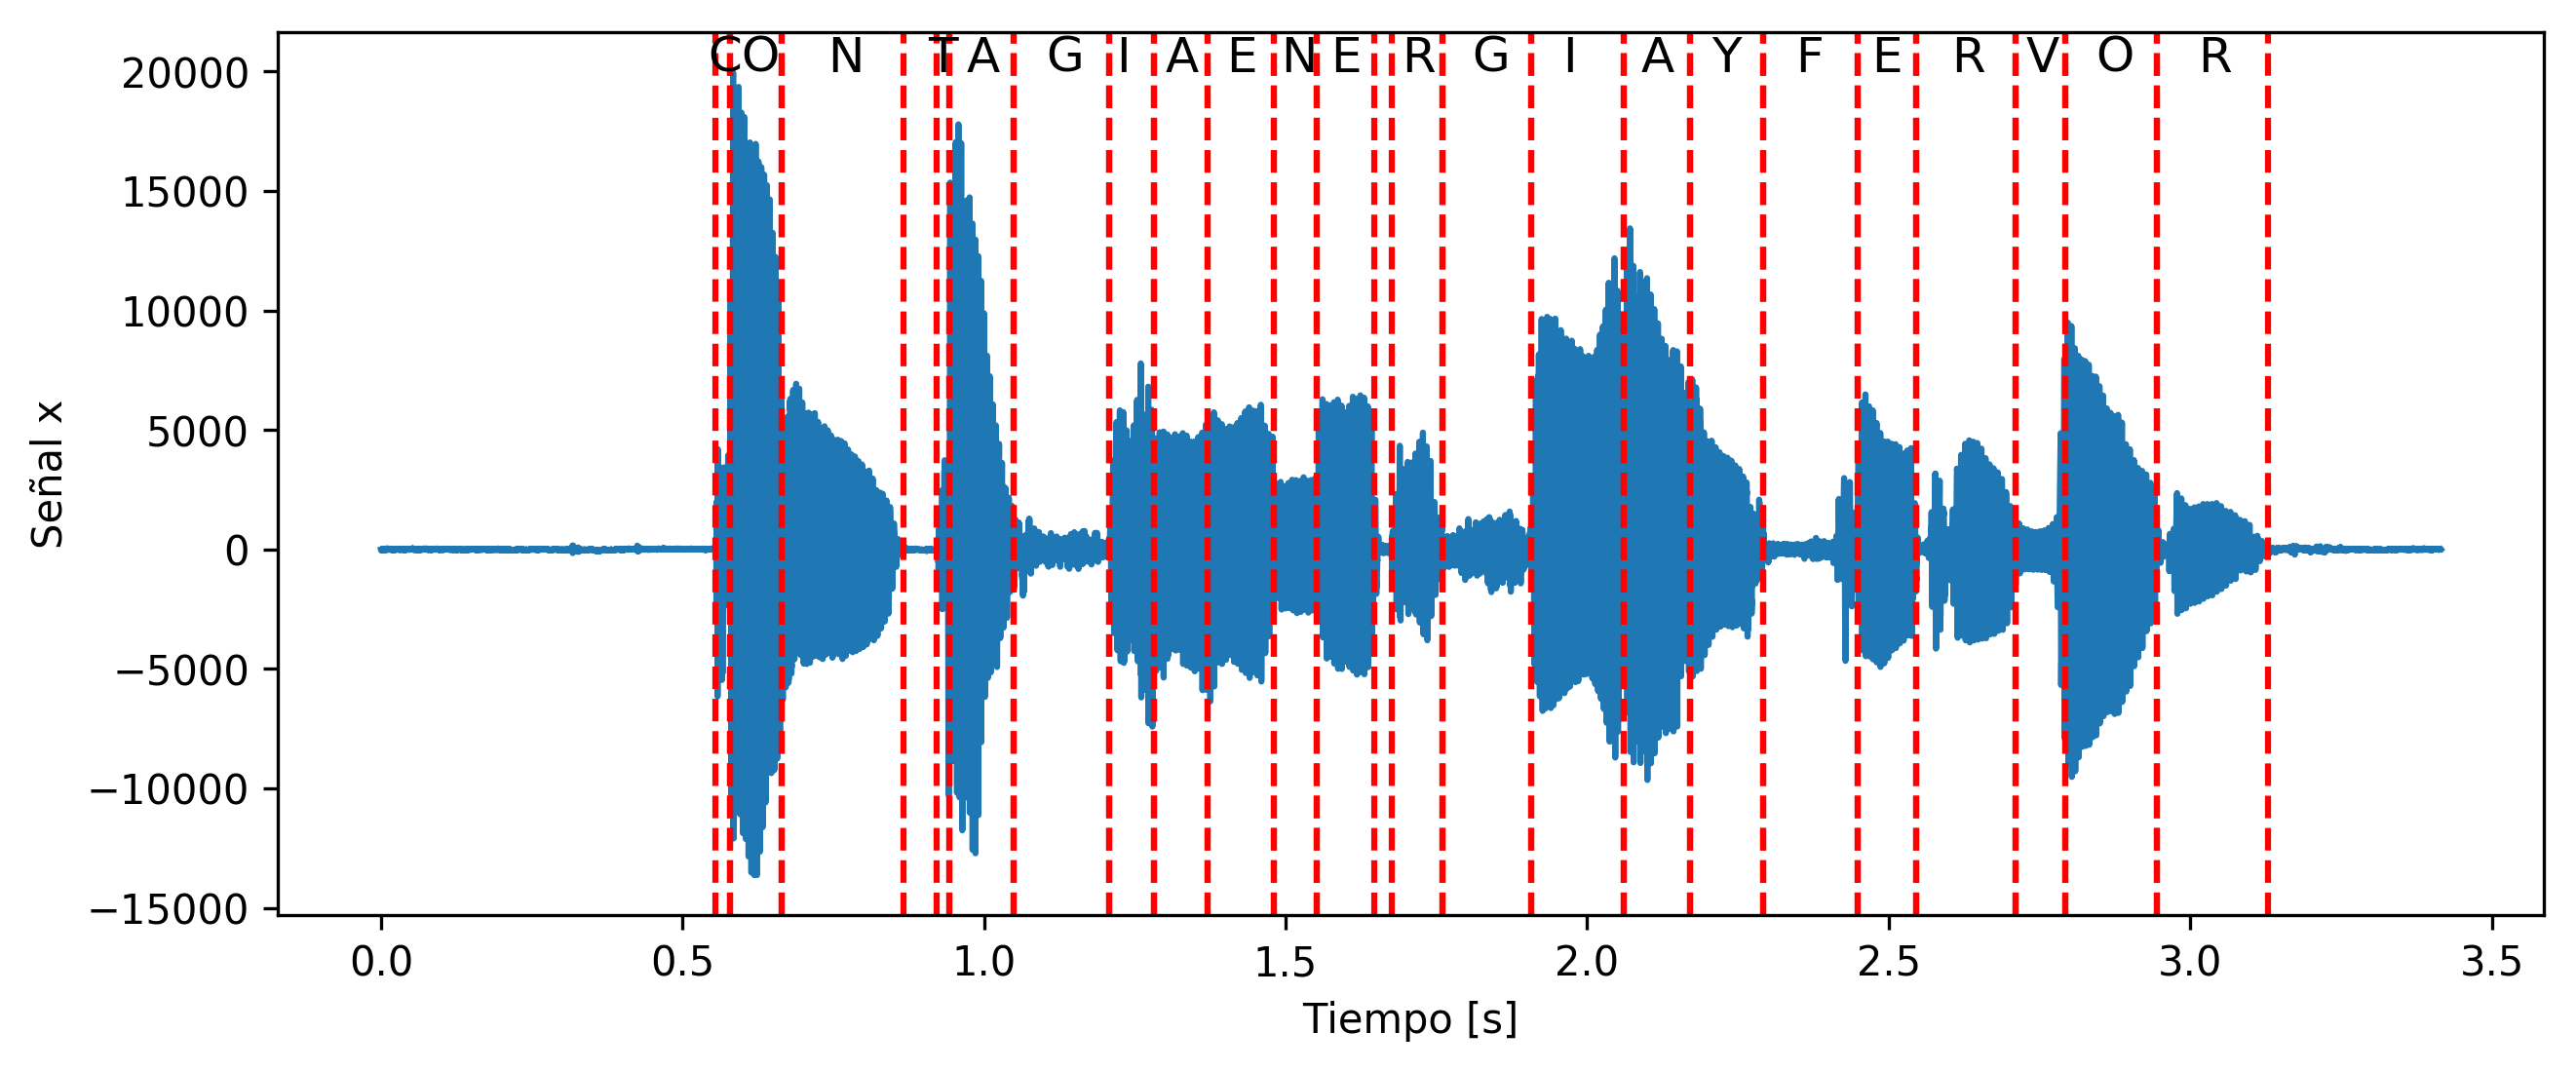

In [27]:
(fs, y) = wav.read("../data/hh15.WAV")
t = np.arange(0, len(y) / fs, 1 / fs)
plt.plot(t, y)
plt.xlabel("Tiempo [s]")
plt.ylabel("Señal x")
for letter in letters:
    offset = 0.025
    x = (letter.start + letter.end) / 2 - offset
    y = 20000
    plt.text(x ,y, letter.char, fontsize=12)
    plt.axvline(x=letter.start, color='r', linestyle='dashed')
    plt.axvline(x=letter.end, color='r', linestyle='dashed')
plt.show()


## Ejercicio 2

Obtenemos un periodo de la segunda 'A' de contagia y lo graficamos

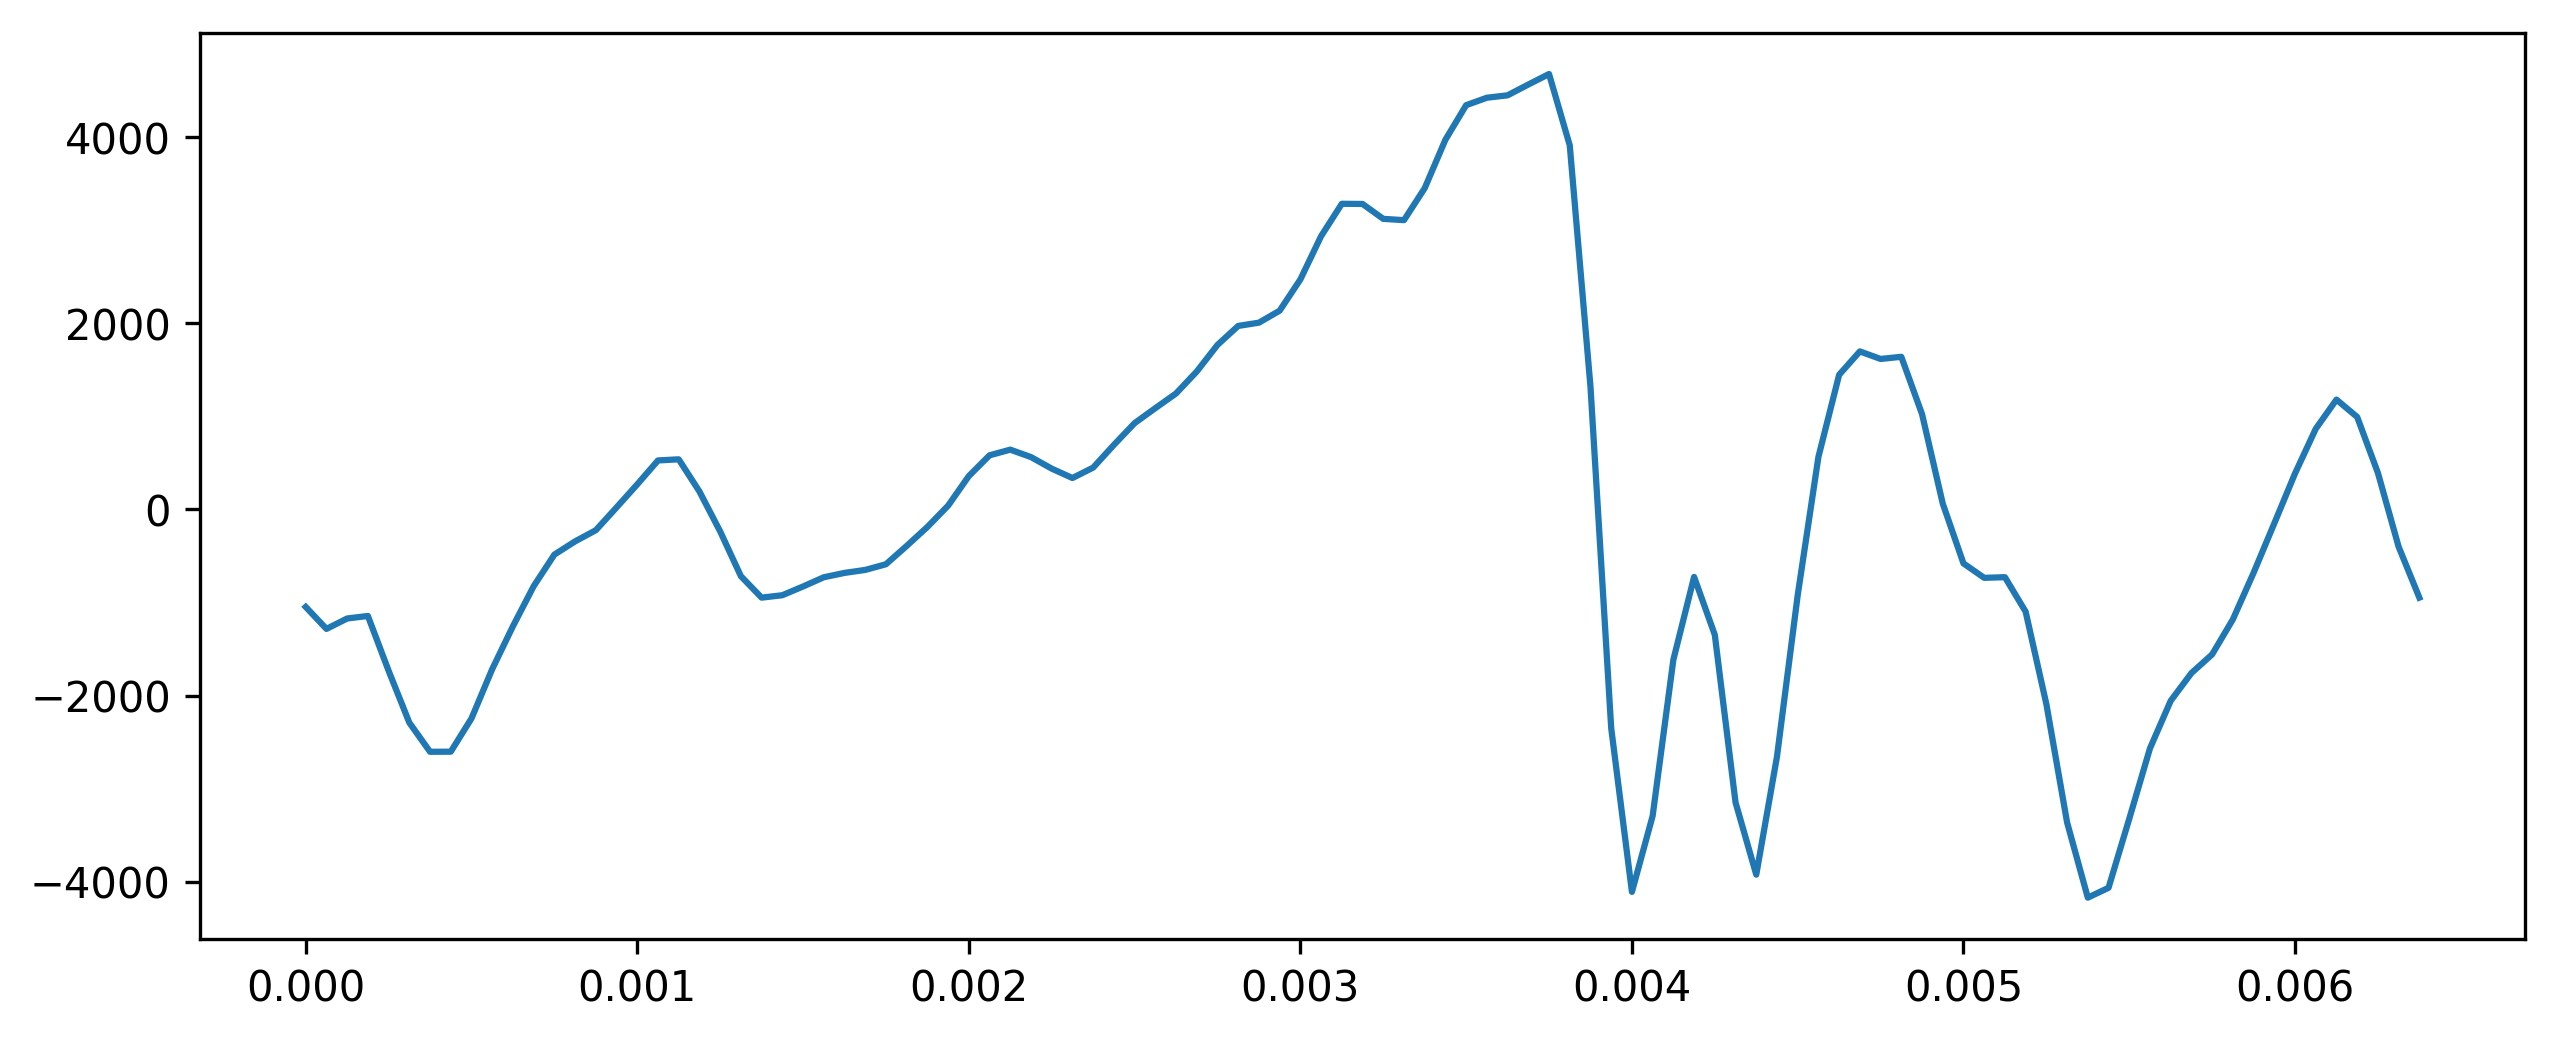

In [28]:
# Segunda 'A' de contagia
(fs, y) = wav.read("../data/hh15.WAV")
t = np.arange(0, len(y) / fs, 1 / fs)
period_start = 1.30657
period_end = 1.313
T = period_end - period_start
x = y[int(period_start * fs): int(period_end * fs)]
t = np.arange(0, len(x) / fs, 1 / fs)
plt.plot(t, x)

<StemContainer object of 3 artists>

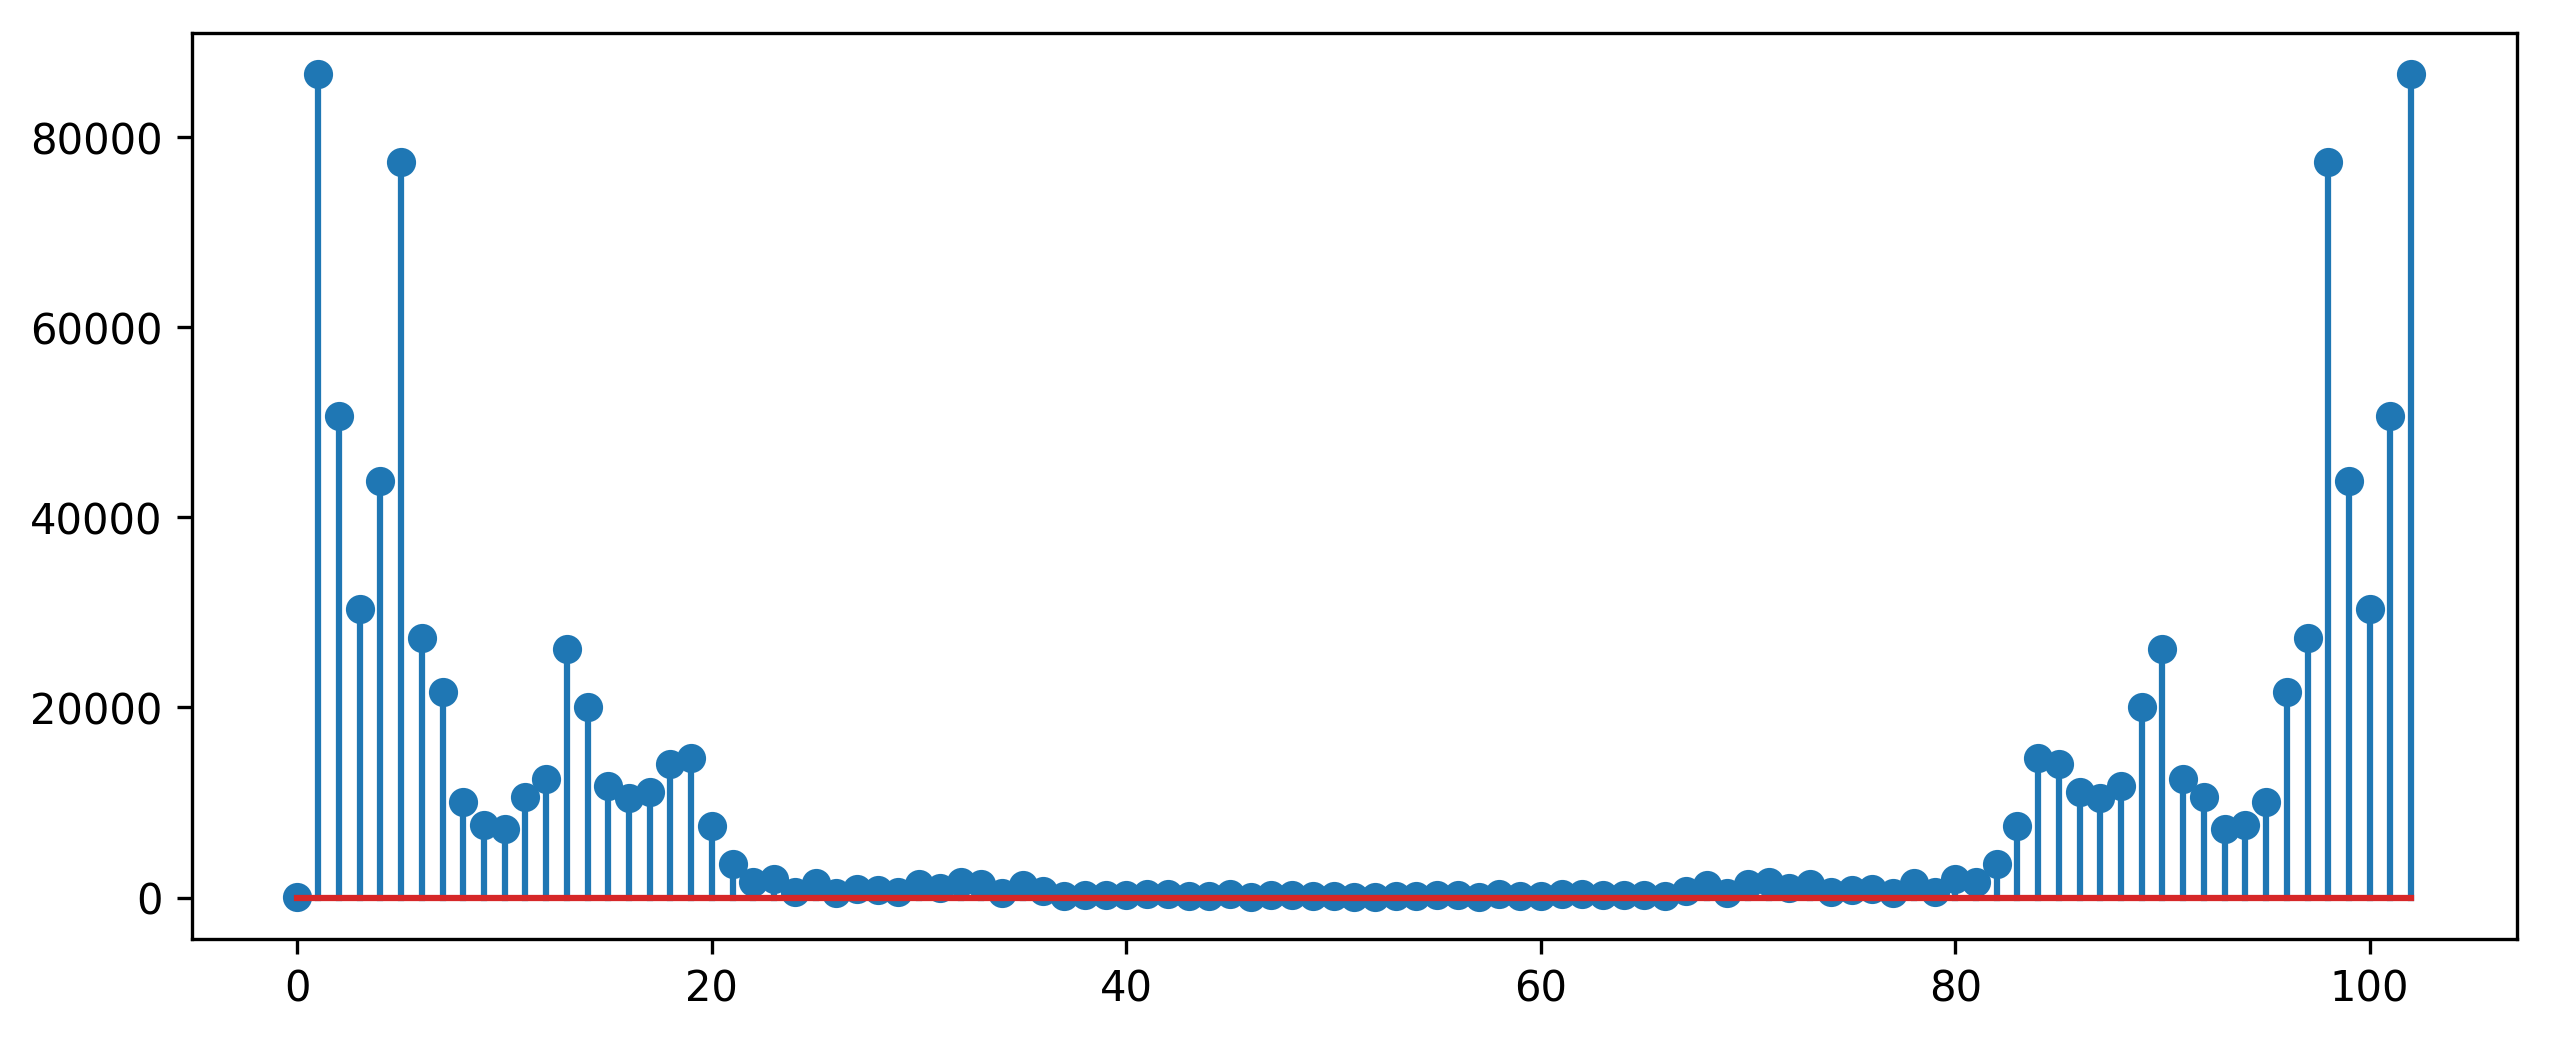

In [29]:
# Tomamos transformada de Fourier
X = np.fft.fft(x)
mod = np.absolute(X)
plt.stem(mod)